In [105]:
import pandas as pd
import numpy as np
import re
from keras.models import load_model
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from spellchecker import SpellChecker
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV


# Load data
train_data = pd.read_csv('final_train.csv')
test_data = pd.read_csv('final_test.csv')


In [106]:
test_data.head()

,text,new_label
0,@rubn_ak @asissa825,not_bully-Spam
1,nigga u wanna get put on an amber alert?,bully-Ham
2,"As soon as I heard the joke, I dropped my four...",bully-Ham
3,The man who wrote it.,not_bully-Ham
4,This doesn't require rhetoric.,bully-Ham


In [107]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

X_train = tokenizer.texts_to_sequences(train_data['text'])
X_test = tokenizer.texts_to_sequences(test_data['text'])

# Pad sequences
maxlen = 100  # adjust as needed
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Encode labels
label_mapping = {
    'bully-Spam': 0,
    'not_bully-Spam': 1,
    'bully-Ham': 2,
    'not_bully-Ham': 3
}
y_train = train_data['new_label'].map(label_mapping)
y_test = test_data['new_label'].map(label_mapping)

In [108]:
# Build DNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train DNN model
history=model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)


Epoch 1/15
40/40 [==============================] - 1s 14ms/step - loss: 0.9929 - accuracy: 0.5115 - val_loss: 1.1171 - val_accuracy: 0.1560
Epoch 2/15
40/40 [==============================] - 0s 9ms/step - loss: 0.7527 - accuracy: 0.6630 - val_loss: 0.7898 - val_accuracy: 0.7943
Epoch 3/15
40/40 [==============================] - 0s 9ms/step - loss: 0.5830 - accuracy: 0.8279 - val_loss: 0.6329 - val_accuracy: 0.8227
Epoch 4/15
40/40 [==============================] - 0s 9ms/step - loss: 0.3757 - accuracy: 0.9151 - val_loss: 0.5949 - val_accuracy: 0.7589
Epoch 5/15
40/40 [==============================] - 0s 9ms/step - loss: 0.2321 - accuracy: 0.9445 - val_loss: 0.5097 - val_accuracy: 0.8369
Epoch 6/15
40/40 [==============================] - 0s 9ms/step - loss: 0.1402 - accuracy: 0.9659 - val_loss: 0.4869 - val_accuracy: 0.8298
Epoch 7/15
40/40 [==============================] - 0s 9ms/step - loss: 0.0905 - accuracy: 0.9754 - val_loss: 0.4481 - val_accuracy: 0.8582
Epoch 8/15
40/40 [=

In [109]:
# Evaluate DNN model
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1)
print("DNN Classification Report:")
print(classification_report(y_test, y_pred))

14/14 [==============================] - 0s 3ms/step
DNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.90      0.83      0.86       115
           2       0.77      0.84      0.80       102
           3       0.84      0.83      0.83       199

    accuracy                           0.84       426
   macro avg       0.85      0.87      0.86       426
weighted avg       0.84      0.84      0.84       426



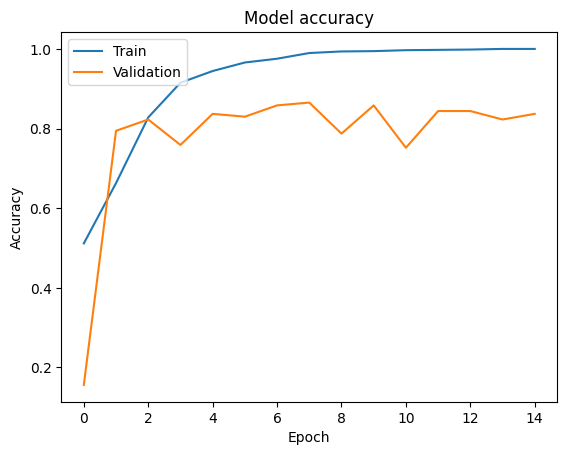

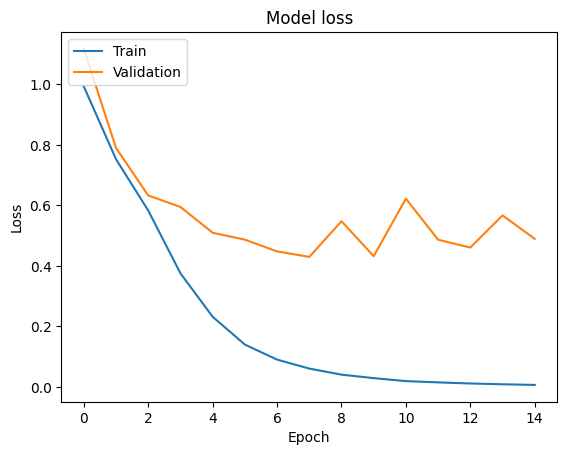

In [110]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [92]:
saved_model = load_model("final_dnn.h5")

In [93]:

import numpy as np

# Preprocess new text
new_text = "This nigger has no whores, no band, no whores can work in strip clubs, sometimes strip clubs."
new_text_sequence = tokenizer.texts_to_sequences([new_text])
new_text_padded = pad_sequences(new_text_sequence, padding='post', maxlen=maxlen)

# Make predictions on new text
new_text_prediction = saved_model.predict(new_text_padded)
predicted_label = np.argmax(new_text_prediction)

# Map predicted label back to original label
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
predicted_label_text = reverse_label_mapping[predicted_label]

print("Predicted label for the new text:", predicted_label_text)


1/1 [==============================] - 0s 96ms/step
Predicted label for the new text: bully-Spam


In [97]:
# Tokenize text

# Load data
train_data = pd.read_csv('final_train.csv')
test_data = pd.read_csv('final_test.csv')
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

X_train = tokenizer.texts_to_sequences(train_data['text'])
X_test = tokenizer.texts_to_sequences(test_data['text'])

# Pad sequences
maxlen = 100  # adjust as needed
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Encode labels
label_mapping = {
    'bully-Spam': 0,
    'not_bully-Spam': 1,
    'bully-Ham': 2,
    'not_bully-Ham': 3
}
y_train = train_data['new_label'].map(label_mapping)
y_test = test_data['new_label'].map(label_mapping)

In [98]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Nadam
import pandas as pd

# Define a list of optimizers to try along with their learning rates
optimizers = {
    'rmsprop': RMSprop(lr=0.001),
    'adadelta': Adadelta(lr=1.0),
    'nadam': Nadam(lr=0.002)
}

report_dfs = []

# DataFrame to store all reports
report_df = pd.DataFrame(columns=['Optimizer', 'Learning Rate', 'Class', 'Precision', 'Recall', 'F1-score', 'Support'])

# Loop over each optimizer
for optimizer_name in optimizers:
    # Build DNN model
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=optimizers[optimizer_name], loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    
    # Evaluate on the test set
    predictions = model.predict(X_test)
    y_pred = predictions.argmax(axis=1)
    
    # Generate classification report
    print("Report for",optimizer_name)
    print(classification_report(y_test, y_pred))

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adadelta.py:79: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\nadam.py:86: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


14/14 [==============================] - 0s 3ms/step
Report for rmsprop
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.85      0.83      0.84       115
           2       0.78      0.75      0.77       102
           3       0.80      0.82      0.81       199

    accuracy                           0.81       426
   macro avg       0.83      0.83      0.83       426
weighted avg       0.81      0.81      0.81       426

14/14 [==============================] - 0s 3ms/step
Report for adadelta
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.75      0.82      0.78       115
           2       0.76      0.74      0.75       102
           3       0.77      0.77      0.77       199

    accuracy                           0.76       426
   macro avg       0.82      0.66      0.69       426
weighted avg       0.77      0.76      0